# Human Machine Interaction and Bias Mitigation
### Predicting Diabetes Insipidus using dedicated Biomarkers

Diabetes insipidus (DI) is a rare condition characterized by an imbalance in water regulation, leading to excessive urination and intense thirst. Unlike diabetes mellitus, DI is not related to blood sugar levels but rather to a deficiency in the hormone vasopressin (antidiuretic hormone, ADH) or the kidneys' response to it. There are two primary types of DI: central and nephrogenic. 

- **Central diabetes insipidus**
    - occurs due to insufficient production or release of ADH from the hypothalamus or pituitary gland, often resulting from injury, surgery, or genetic factors. 
- **Nephrogenic diabetes insipidus**
    - on the other hand, arises when the kidneys fail to respond adequately to ADH, which can be caused by genetic mutations, certain medications, or chronic kidney disorders. 
    
Understanding these variations is crucial for accurate diagnosis and effective treatment, as the underlying causes and management strategies differ significantly between the two types.

In [182]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [183]:
# Load the data file
file_path = '../data/diabetes_study_final_data.csv'
df = pd.read_csv(file_path, delimiter=',')

# Exploratory data analysis

In [184]:
# Display the first few rows of the dataframe
df

,Age,Gender,Ethnicity,BMI,BloodSugarLevel,InsulinResistance,GeneticFactor
0,56,0,1,18.303039,91.118631,0.000000,0.0
1,69,0,4,28.052368,108.830756,0.301111,0.0
2,46,1,4,30.947376,91.569805,0.000000,0.0
3,32,1,0,26.874690,98.878487,0.301111,0.0
4,60,1,3,28.052368,90.062769,0.000000,0.0
...,...,...,...,...,...,...,...
995,78,1,3,28.013502,106.846173,0.000000,0.0
996,23,0,1,29.311285,103.303079,0.000000,0.0
997,35,1,3,31.697081,85.511755,1.000000,0.0
998,68,0,0,23.944416,108.491801,1.000000,0.0


In [185]:
# check the dimensions of the data with df.shape attribute.
df.shape

(1000, 7)

We can view the top five and bottom five rows of the dataset with df.head() and df.tail() methods respectively.

In [186]:
df.head()

,Age,Gender,Ethnicity,BMI,BloodSugarLevel,InsulinResistance,GeneticFactor
0,56,0,1,18.303039,91.118631,0.000000,0.0
1,69,0,4,28.052368,108.830756,0.301111,0.0
2,46,1,4,30.947376,91.569805,0.000000,0.0
3,32,1,0,26.874690,98.878487,0.301111,0.0
4,60,1,3,28.052368,90.062769,0.000000,0.0


In [187]:
df.tail()

,Age,Gender,Ethnicity,BMI,BloodSugarLevel,InsulinResistance,GeneticFactor
995,78,1,3,28.013502,106.846173,0.0,0.0
996,23,0,1,29.311285,103.303079,0.0,0.0
997,35,1,3,31.697081,85.511755,1.0,0.0
998,68,0,0,23.944416,108.491801,1.0,0.0
999,22,1,1,28.052368,93.648540,1.0,0.0


**Interpretation**

We can see that there are lot of discrepancies in the dataset.

For example, the age and sex columns are combined together with an underscore. There should be two separate columns of age and sex.

The height and weight columns contain missing values. Some values are coded as "xx", "?", "0" and negative values. They are all invalid values as height and weight must be positive real numbers.

The three columns spend_A, spend_B and spend_C denote spending at three supermarkets A,B and C. These columns must contain positive real numbers. The missing values in these columns denote nothing spend in that market. The negative value and the value coded as "xx" should be addressed properly.

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1000 non-null   int64  
 1   Gender             1000 non-null   int64  
 2   Ethnicity          1000 non-null   int64  
 3   BMI                1000 non-null   float64
 4   BloodSugarLevel    1000 non-null   float64
 5   InsulinResistance  1000 non-null   float64
 6   GeneticFactor      1000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 54.8 KB


### Handling invalid values

view the summary statistics of numerical columns with df.describe() method. It enable us to detect outliers in the data which require further investigation.



In [189]:
df.describe()

,Age,Gender,Ethnicity,BMI,BloodSugarLevel,InsulinResistance,GeneticFactor
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.380000,0.477000,1.888000,28.052368,105.053928,0.301111,0.150000
std,18.378666,0.499721,1.403362,3.743058,14.235055,0.435418,0.338917
min,18.000000,0.000000,0.000000,15.921951,70.000000,0.000000,0.000000
25%,35.000000,0.000000,1.000000,25.820978,96.149359,0.000000,0.000000
50%,50.000000,0.000000,2.000000,28.052368,105.053928,0.000000,0.000000
75%,66.000000,1.000000,3.000000,30.341792,113.705994,1.000000,0.000000
max,80.000000,1.000000,4.000000,40.772430,140.000000,1.000000,1.000000


## Evaluation of biomarkers

Discuss its significance and usability for diagnosis. 
Highlight the relevance of each biomarker in the context of the disease or condition being diagnosed.

**ChatGPT Prompt**: Please highlight the significance and usability or this features for Diabetes Insipidus in markdown Tabular form and plase add a column that shows the relevance of each feature in the context of diabetes insipidus.

## Summary

|Feature|Description|
|--|--|
|polydipsia|Binary (0: No, 1: Yes)|
|polyuria|Binary (0: No, 1: Yes)|
|nocturia|Binary (0: No, 1: Yes)|
|serum_sodium|Continuous (mEq/L)|
|serum_osmolality|Continuous (mOsm/kg)|
|urine_osmolality|Continuous (mOsm/kg)|
|urine_specific_gravity|Continuous|
|serum_adh|Continuous (pg/mL)|
|plasma_copeptin|Continuous (pmol/L)|
|family_history|Binary (0: No, 1: Yes)|
|mri_abnormalities|Binary (0: No, 1: Yes)|
|avp_gene_mutation|Binary (0: No, 1: Yes)|
|aqp2_gene_mutation|Binary (0: No, 1: Yes)|
|avpr2_gene_mutation|Binary (0: No, 1: Yes)|
|bmi|Continuous (kg/m²)|
|blood_pressure|Continuous (mmHg)|
|age|Continuous (years)|
|sex|Categorical (Male, Female)|
|electrolyte_levels|Continuous (various ions, e.g., K⁺, Ca²⁺)|

# Identify and Address Problems/Biases

- Analyze the data for potential problems or biases. This could include any of the biases we have discusses in class.
- Discuss the expected effects of corrections on the dataset and subsequent analyses. Explain how these corrections will improve the reliability and validity of your results.

**Most common Biases**
- Stereotyping
- The bandwagon effect
- Priming
- Selective preception
- Confirmation bias

**Data Cleaning**
- Invalid Values
- Unbalanced dataset
- Negative Values
- Data Type Transformation
- Outliers

We can see that this method prints information of all columns. Several columns contain missing values. We have seen that columns contain missing and invalid values are coded differently. So, we need to explore this issue further.


**Number of unique values in column**

In [190]:
# Number of unique values in column
for column in df.columns:
    num_distinct_types = df[column].nunique()
    print(f"Number of distinct types in {column}: {num_distinct_types}")

Number of distinct types in Age: 63
Number of distinct types in Gender: 2
Number of distinct types in Ethnicity: 5
Number of distinct types in BMI: 901
Number of distinct types in BloodSugarLevel: 887
Number of distinct types in InsulinResistance: 3
Number of distinct types in GeneticFactor: 3


Check for mean imputed values in the dataset

In [191]:
df_original = df.copy()
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        mean_value = df[column].mean()        
        
        # Check for mean-imputed values
        imputed_mask = (df[column] == mean_value)
        if imputed_mask.any():
            print(f"Attention: Mean imputed value found in column: {column}")
        else:
            print(f"OK: No Mean imputed value found in column: {column}")
        

# Calculate the mean of the 'GeneticFactor' column
#mean_value = df['GeneticFactor'].mean()

# Check if there are values which are already mean imputed
#df = df[df['GeneticFactor'] != mean_value]

OK: No Mean imputed value found in column: Age
OK: No Mean imputed value found in column: Gender
OK: No Mean imputed value found in column: Ethnicity
OK: No Mean imputed value found in column: BMI
Attention: Mean imputed value found in column: BloodSugarLevel
Attention: Mean imputed value found in column: InsulinResistance
Attention: Mean imputed value found in column: GeneticFactor


**Data Type Transformation**

There is an invalid value coded as "xx" in column. We can coerce invalid values to "NaN" using the errors keyword as follows:-

In [192]:
# Transform to numeric
#df["Age"] = pd.to_numeric(df["Age"], errors='coerce')
#df.loc[:, 'BMI'] = (df['BMI']).astype(int)

# Round all values to 2 decimal places
#df['BMI'] = df['BMI'].round(2)

**Box plot**

Box plot help us to explore outliers in the data. It help us to identify potentially bad data.

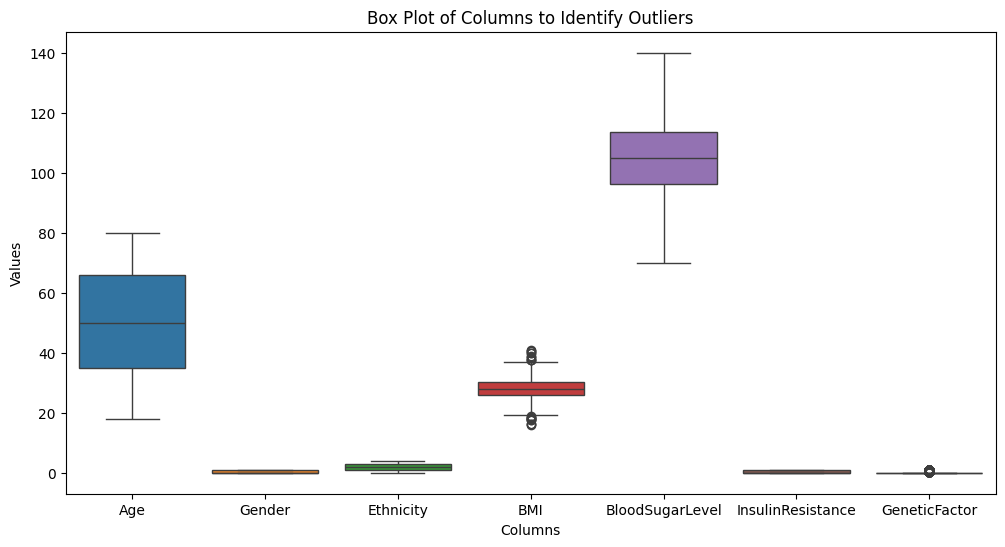

In [193]:
# Identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Columns to Identify Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

**Scatter plot**

Scatter plot help us to explore relationship between two numeric variables. It help us to identify potentially bad data.

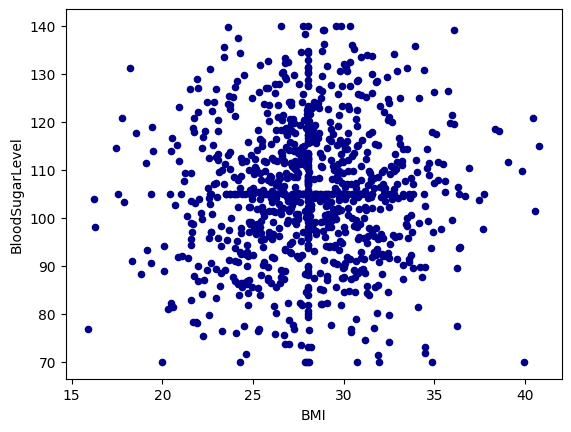

In [194]:
df.plot(kind='scatter',x='BMI', y='BloodSugarLevel', c='DarkBlue')
plt.show()

## Data Balancy

Value Counts for column 'Age':
Age
79    29
75    27
77    25
52    25
45    24
      ..
55     9
27     9
51     8
73     8
60     7
Name: count, Length: 63, dtype: int64





Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



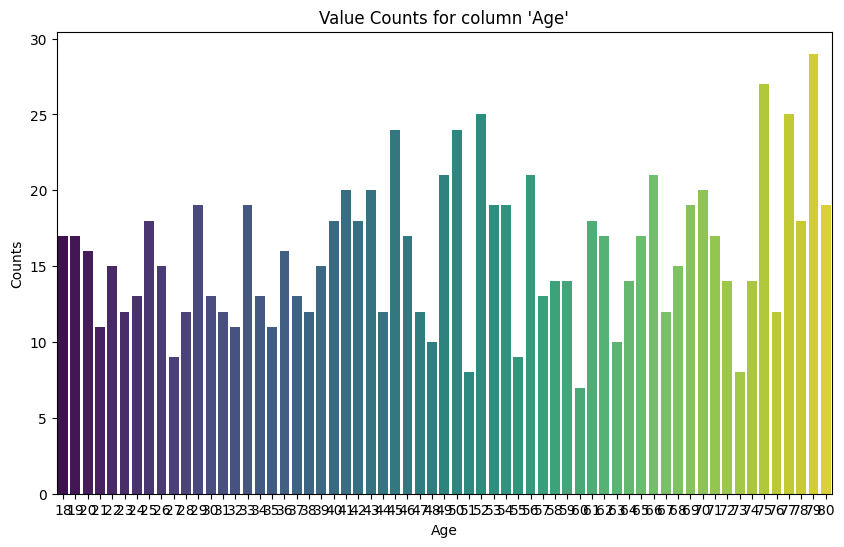

Value Counts for column 'Gender':
Gender
0    523
1    477
Name: count, dtype: int64





Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



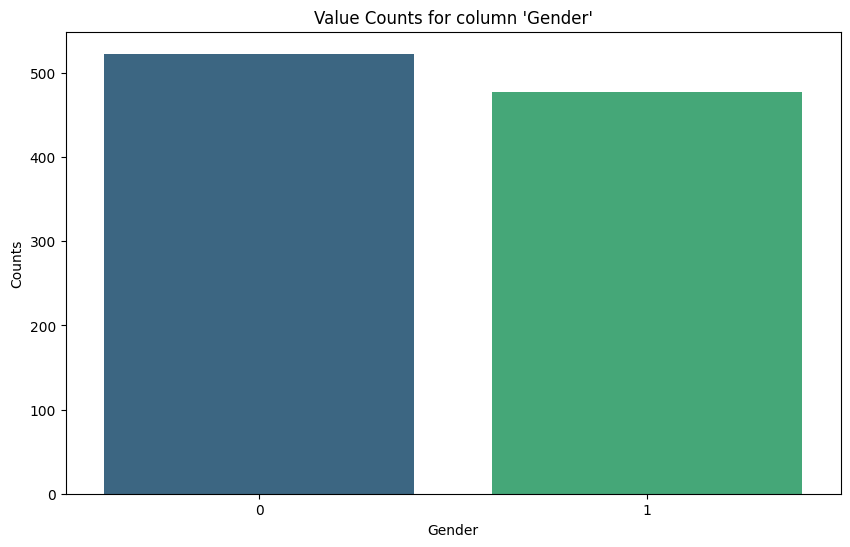

Value Counts for column 'Ethnicity':
Ethnicity
1    285
3    275
0    203
4    152
2     85
Name: count, dtype: int64





Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



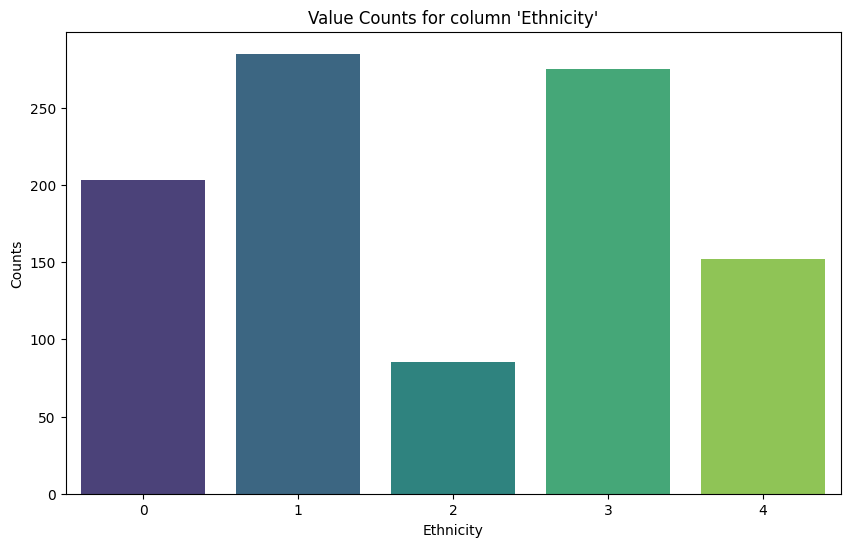

Value Counts for column 'BMI':
BMI
28.052368    100
33.678412      1
25.598306      1
20.533840      1
32.030055      1
            ... 
28.571772      1
34.930060      1
36.925201      1
30.552204      1
34.394589      1
Name: count, Length: 901, dtype: int64





Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



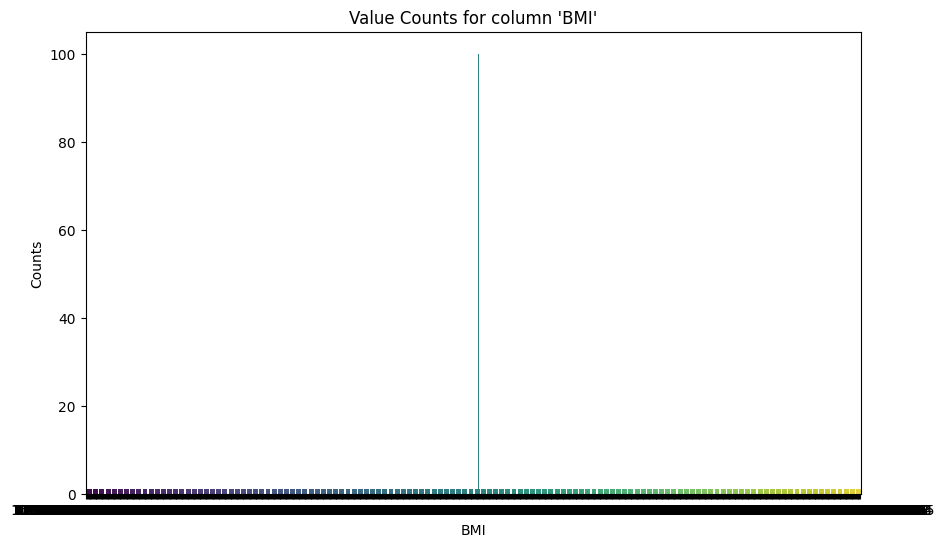

Value Counts for column 'BloodSugarLevel':
BloodSugarLevel
105.053928    100
70.000000      10
140.000000      6
89.247889       1
116.362427      1
             ... 
82.242395       1
116.258688      1
98.757084       1
98.249807       1
107.118857      1
Name: count, Length: 887, dtype: int64





Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



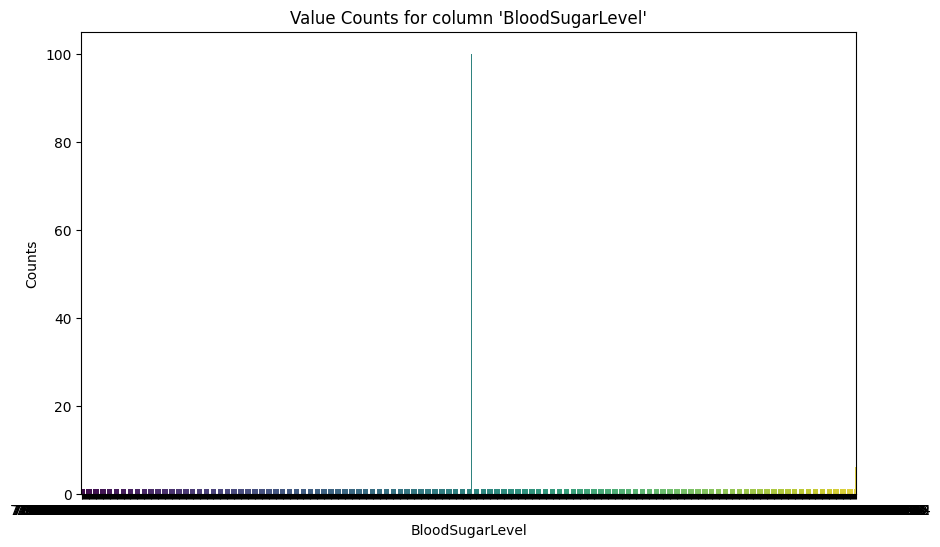

Value Counts for column 'InsulinResistance':
InsulinResistance
0.000000    629
1.000000    271
0.301111    100
Name: count, dtype: int64





Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



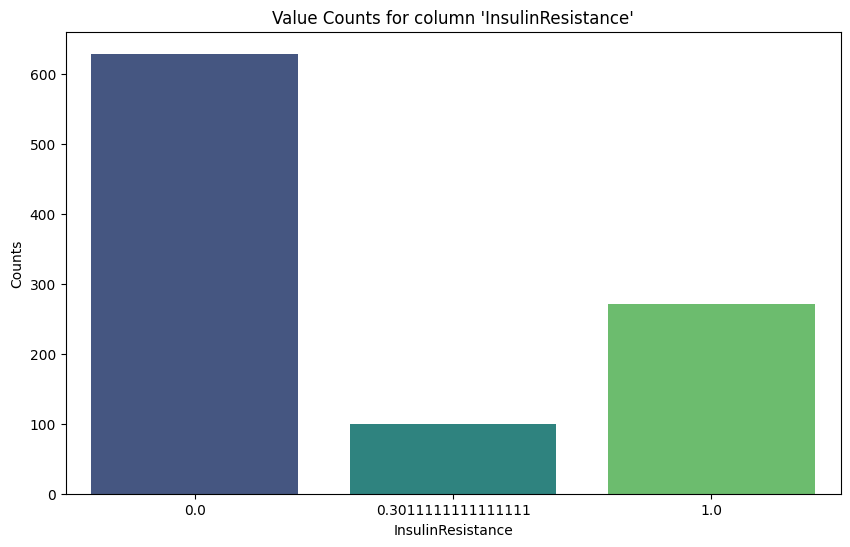

Value Counts for column 'GeneticFactor':
GeneticFactor
0.00    765
1.00    135
0.15    100
Name: count, dtype: int64





Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



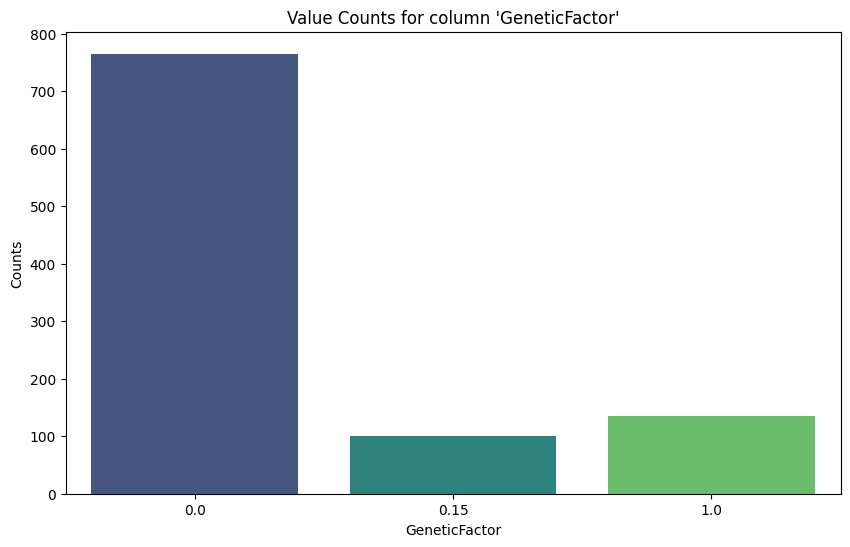

In [195]:
#column_name='GeneticFactor'
#value_counts = df[column_name].value_counts()
#plt.figure(figsize=(10, 6))
#sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
#
## Adding titles and labels
#plt.title("Value Counts for column '{}'".format(column_name))
#plt.xlabel(column_name)
#plt.ylabel('Counts')
#plt.show()

#Shows values of each column and plots it (find differences, often used values, ...)
column_names = df.columns.tolist()
for column_name in column_names:
    value_counts = df[column_name].value_counts()
    print("Value Counts for column '{}':".format(column_name))
    print(value_counts)
    print()
 
    # Plotting the value counts
    plt.figure(figsize=(10, 6))
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
   
    # Adding titles and labels
    plt.title("Value Counts for column '{}'".format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Counts')
    plt.show()

**Split column**

In [196]:
#df[['age','sex']] = df.age_sex.str.split("_", expand = True)
#df.drop(['age_sex'], axis=1, inplace=True)

**Reorder the column labels**

In [197]:
#df = df[['Gender','Age','Ethnicity','BMI','BloodSugarLevel','InsulinResistance','GeneticFactor']]

**Dealing with negative numerical values**

In [198]:
# Suppress settingwithcopywarning

#pd.set_option('mode.chained_assignment', None)
#df['weight(kg)'].replace(-60, 60, inplace=True)

**Dealing with outliers**

When dealing with outliers in data and using imputation techniques like KNN imputation, it's important to handle the imputation process correctly to avoid data leakage and ensure the validity of your model evaluation. First we train test split before any imputation

In [199]:
from sklearn.model_selection import train_test_split

X = df.drop('GeneticFactor', axis=1)
y = df.GeneticFactor
training_features, testing_features, training_target, testing_target = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

In [200]:
# Impute missing data with kNN (k-nearest neighbours)
#training_data = pd.concat([training_features, training_target], axis=1)

from sklearn.neighbors import KNeighborsClassifier
# Replace non-0/1 values with NaN for the InsulinResistance column
df['InsulinResistance'] = df['InsulinResistance'].apply(lambda x: x if x in [0, 1] else np.nan)

# Separate the rows with NaN values in 'InsulinResistance'
df_missing = df[df['InsulinResistance'].isna()]
df_complete = df.dropna(subset=['InsulinResistance'])

features = df_complete.drop(columns='InsulinResistance')
target = df_complete['InsulinResistance']

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(features, target)

# Predict the missing values
df_missing['InsulinResistance'] = knn.predict(df_missing.drop(columns='InsulinResistance'))

# Combine the datasets
df_combined = pd.concat([df_complete, df_missing]).sort_index()
df = df_combined


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**Mean Imputation of missing data**

In [201]:
#df['InsulinResistance'] = df['InsulinResistance'].apply(lambda x: x if x in [0, 1] else np.nan)

# Calculate mean for each column
#mean_values = df.mean()

# Fill missing values with mean
#df = df.fillna(mean_values)

# Parameter Importance Analysis

- Perform an analysis to determine the importance of different biomarkers.
- Identify which biomarkers are the most critical for accurate diagnosis and discuss why they are significant.

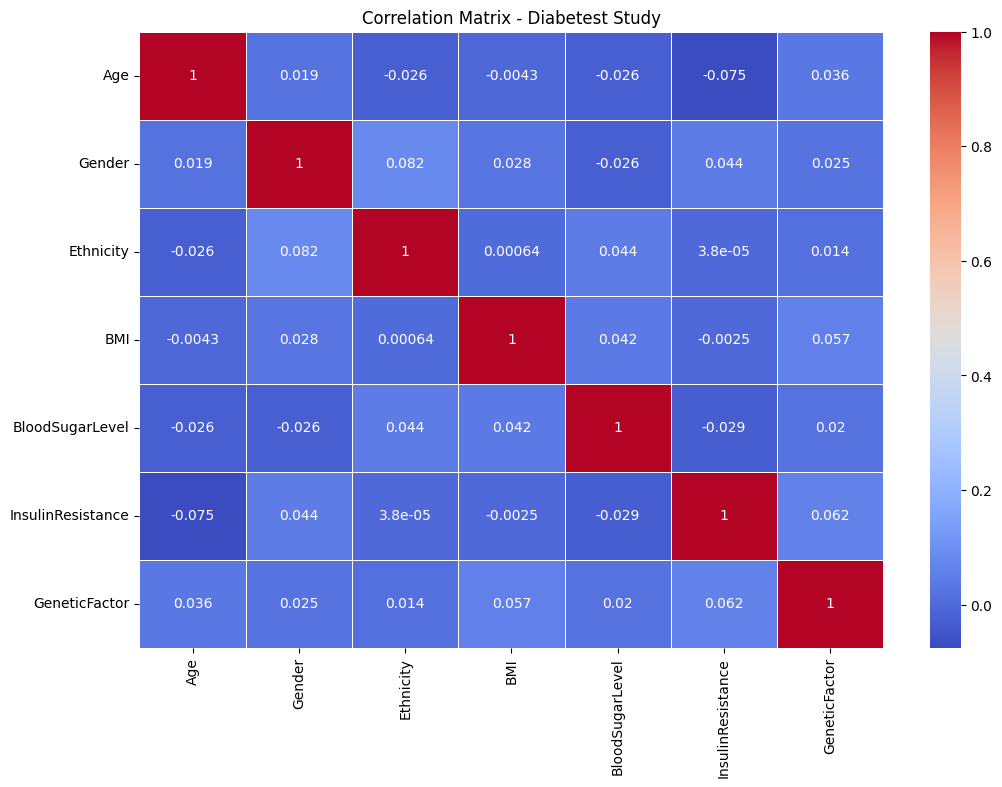

In [202]:
# Generate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Diabetest Study')
plt.show()

In [203]:
#df.loc[:, 'BloodSugarLevel'] = (df['BloodSugarLevel']).astype(int)
#df.loc[:, 'BMI'] = (df['BMI']).astype(int)
# Calculate the mean of the 'InsulinResistance' column
mean_value = df['GeneticFactor'].mean()
df = df[df['GeneticFactor'] != mean_value]

mean_value = df['BloodSugarLevel'].mean()
df = df[df['BloodSugarLevel'] != mean_value]
df = df[df['BloodSugarLevel'] != 105.053928]

mean_value = df['InsulinResistance'].mean()
df = df[df['InsulinResistance'] != mean_value]

mean_value = df['GeneticFactor'].mean()
df = df[df['GeneticFactor'] != mean_value]

#df_include = df.loc[df['BMI'] == 28.052368]
#df = df.loc[(df['BMI']<28.06) & (df['BMI']>28.05)]

mean_value = df['BMI'].mean()
df = df[df['BMI'] != mean_value]
df = df[df['BMI'] != 28.052368]


Value Counts for column 'Age':
Age
75    4
39    3
24    3
78    3
65    3
33    3
20    3
80    3
26    3
25    2
54    2
74    2
29    2
76    2
46    2
69    2
43    2
66    2
22    2
42    2
41    2
62    2
50    2
49    2
18    2
71    2
45    2
44    2
61    1
60    1
53    1
48    1
35    1
64    1
67    1
23    1
68    1
31    1
30    1
79    1
73    1
77    1
58    1
59    1
52    1
47    1
36    1
56    1
Name: count, dtype: int64





Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



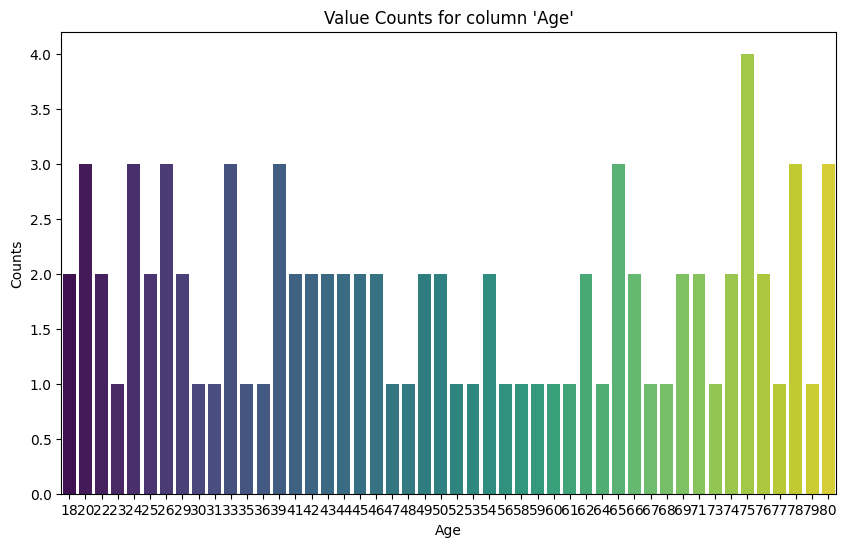

Value Counts for column 'Gender':
Gender
0    49
1    37
Name: count, dtype: int64





Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



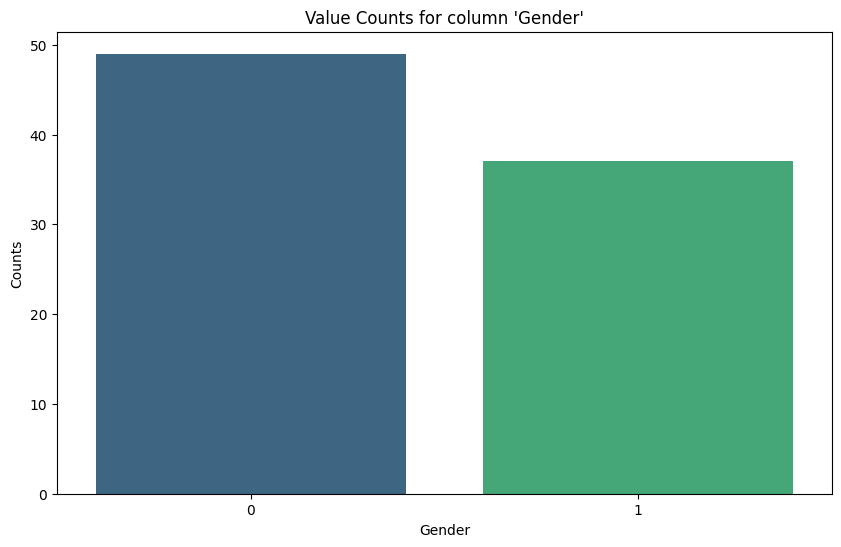

Value Counts for column 'Ethnicity':
Ethnicity
3    33
1    21
0    17
4     9
2     6
Name: count, dtype: int64





Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



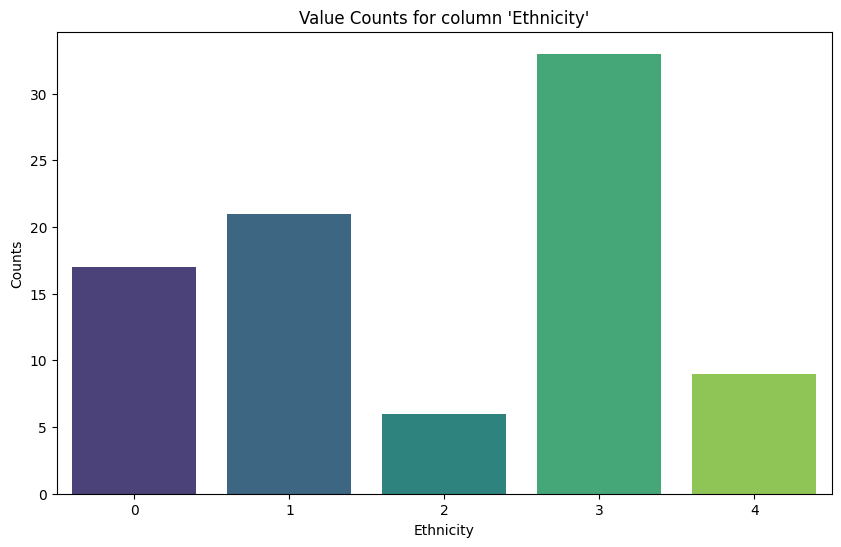

Value Counts for column 'BMI':
BMI
28.052368    85
28.057092     1
Name: count, dtype: int64





Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



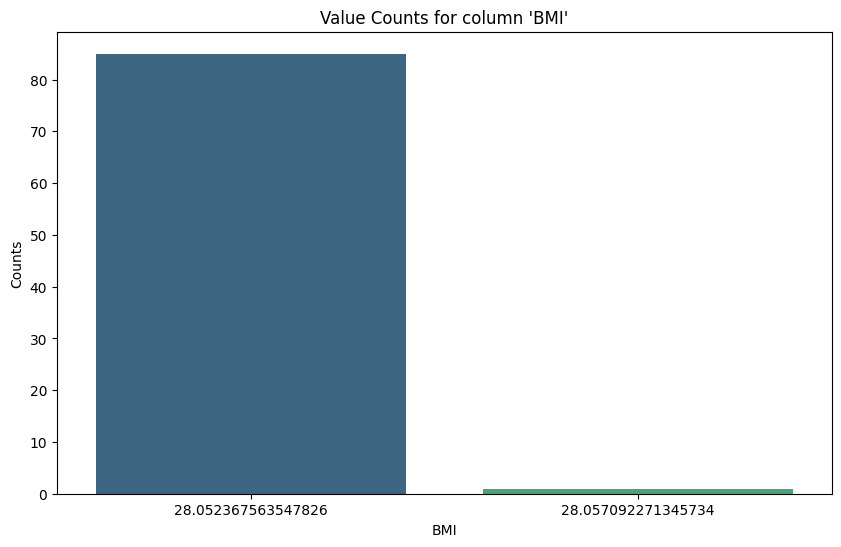

Value Counts for column 'BloodSugarLevel':
BloodSugarLevel
105.053928    15
116.034330     1
107.777633     1
97.478968      1
85.243021      1
              ..
112.191623     1
117.305160     1
88.040770      1
131.332135     1
100.181359     1
Name: count, Length: 72, dtype: int64





Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



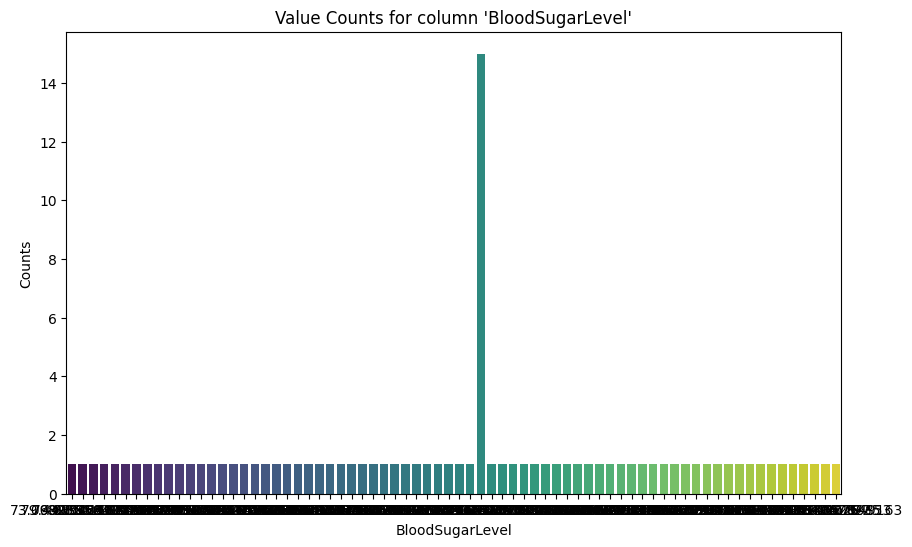

Value Counts for column 'InsulinResistance':
InsulinResistance
0.0    58
1.0    28
Name: count, dtype: int64





Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



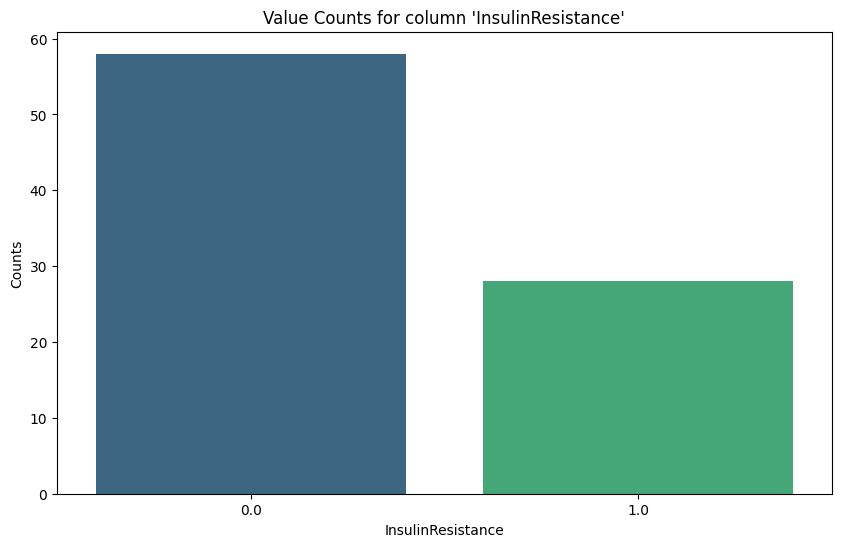

Value Counts for column 'GeneticFactor':
GeneticFactor
0.0    76
1.0    10
Name: count, dtype: int64





Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



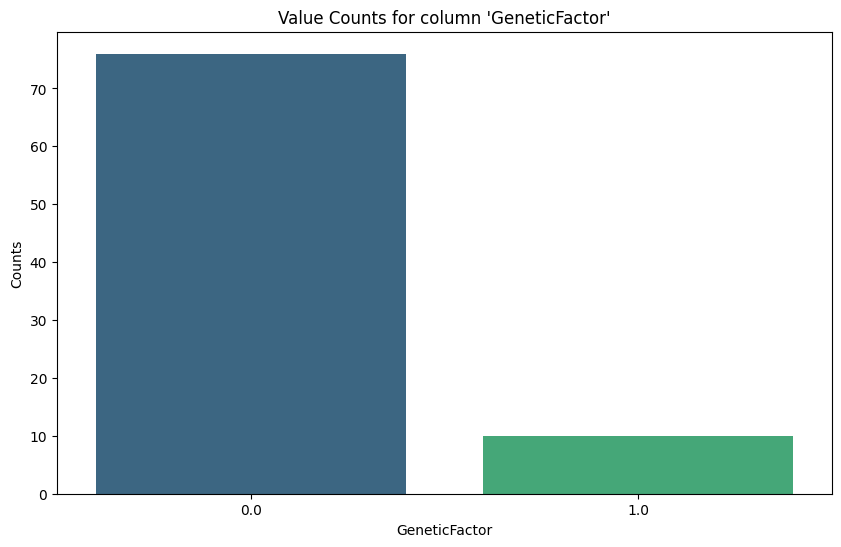

In [204]:
#column_name='GeneticFactor'
#value_counts = df[column_name].value_counts()
#plt.figure(figsize=(10, 6))
#sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
#
## Adding titles and labels
#plt.title("Value Counts for column '{}'".format(column_name))
#plt.xlabel(column_name)
#plt.ylabel('Counts')
#plt.show()

#Shows values of each column and plots it (find differences, often used values, ...)
column_names = df.columns.tolist()
for column_name in column_names:
    value_counts = df[column_name].value_counts()
    print("Value Counts for column '{}':".format(column_name))
    print(value_counts)
    print()
 
    # Plotting the value counts
    plt.figure(figsize=(10, 6))
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
   
    # Adding titles and labels
    plt.title("Value Counts for column '{}'".format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Counts')
    plt.show()

In [205]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

X = df.drop('GeneticFactor', axis=1)
y = df.GeneticFactor
training_features, testing_features, training_target, testing_target = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

# (limit to depth 2 for better readability of the model) -> ok it's a bit radical, but we want to really see
# what is most important...
dtree = DecisionTreeClassifier(max_depth=2)

# train Decision Tree classifer
dtree = dtree.fit(training_features,training_target)

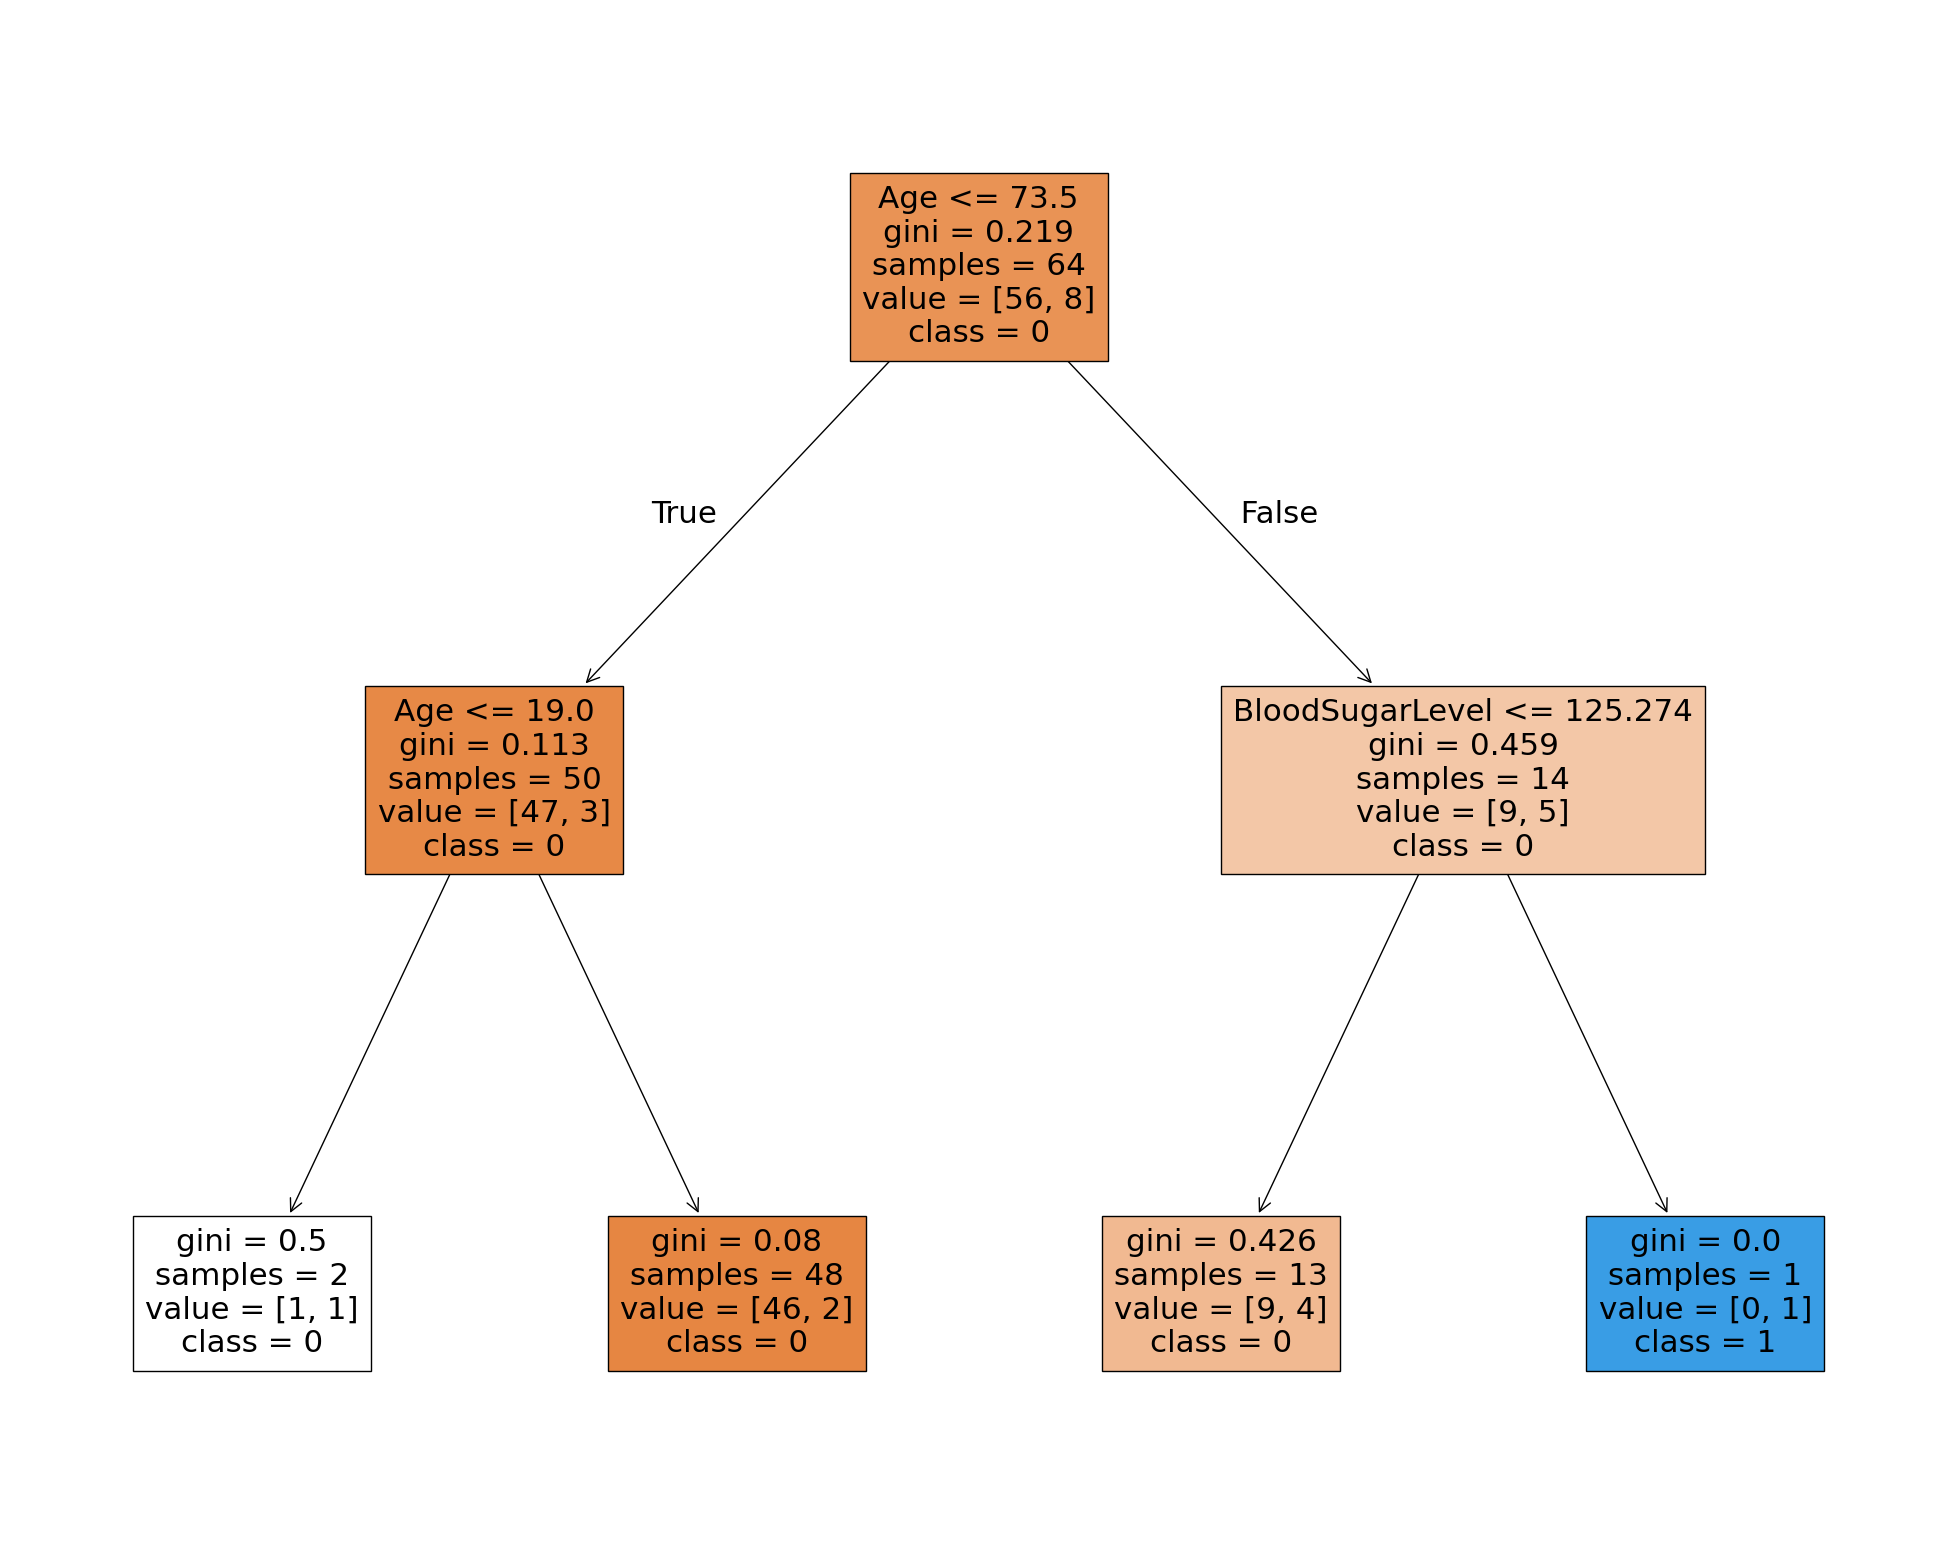

In [206]:
from sklearn import tree

# plot the tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, feature_names=df.columns.values.tolist(), class_names=['0','1'], filled=True)



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



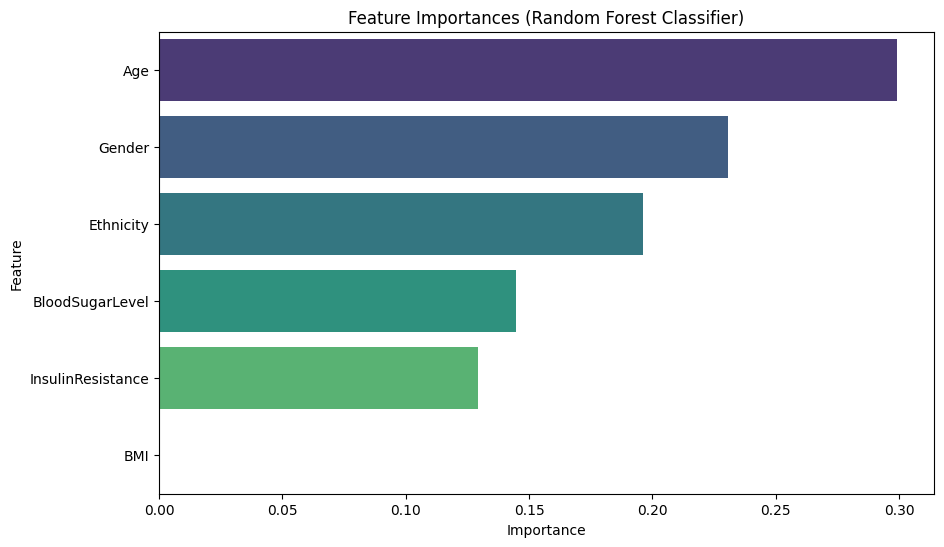

[07:51:04] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


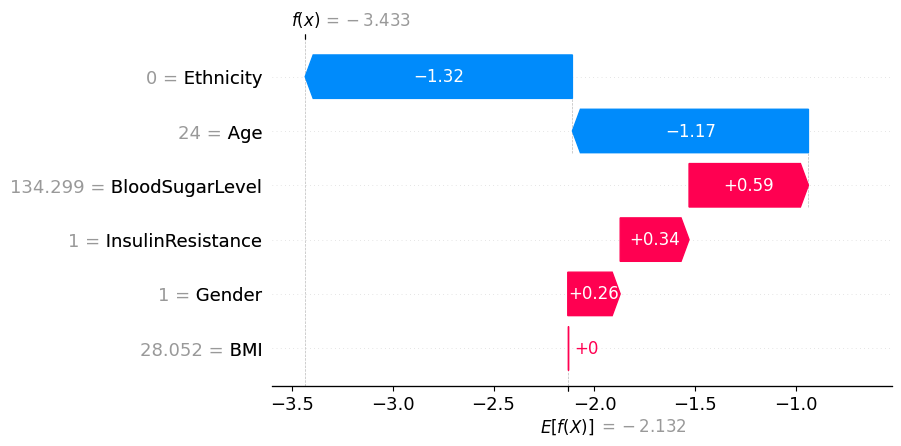

In [207]:
import xgboost as xgb
import shap


model = xgb.XGBClassifier()
model.fit(training_features.values, training_target.values)

# Get feature importances from the trained model
feature_importances = model.feature_importances_
xgb.XGBClassifier
# Create a DataFrame for visualizing feature importance
features = pd.DataFrame({
    'Feature': training_features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features, palette='viridis')
plt.title('Feature Importances (Random Forest Classifier)')
plt.show()

expl = shap.TreeExplainer(model)
vals = expl(testing_features)
shap.plots.waterfall(vals[0])

In [208]:
# SHAP
import shap

explainer = shap.Explainer(model, training_features)
shap_values = explainer(testing_features)

[07:51:04] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


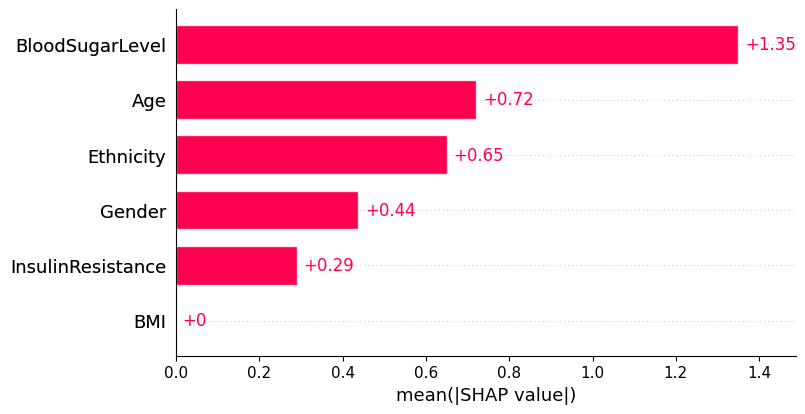

In [209]:
shap.plots.bar(shap_values)

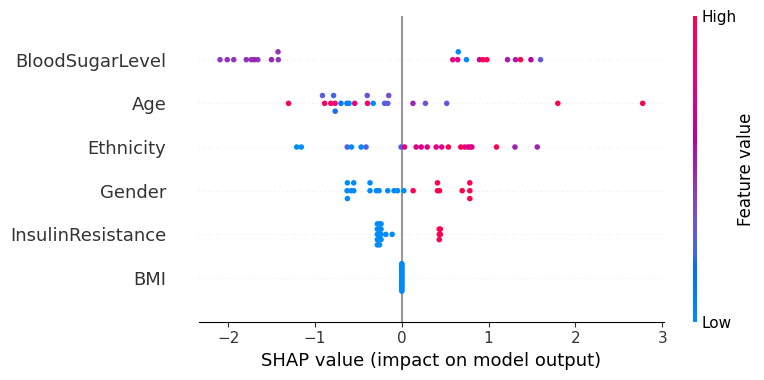

In [210]:
shap.summary_plot(shap_values, testing_features)

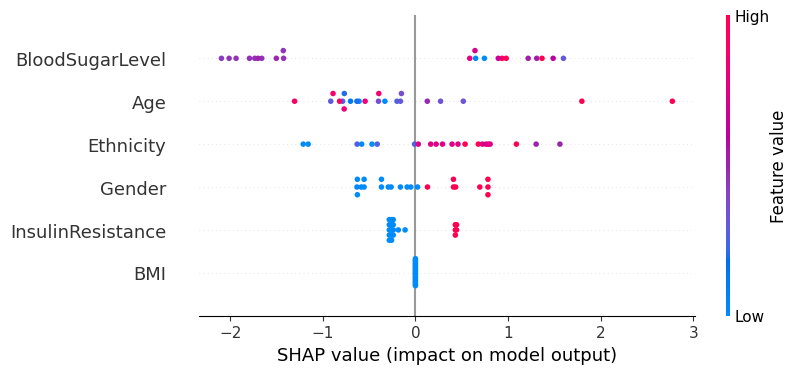

In [211]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.beeswarm(shap_values)

In [212]:
#shap.plots.waterfall(shap_values)

# Model Creation for Prognosis

- Using the corrected data and insights from the parameter importance analysis, develop a predictive model to provide a reliable diagnosis.
- Explain the choice of model and justify why it is suitable for this task.
- Validate the model using appropriate techniques such as cross-validation, and evaluate its performance using relevant metrics (e.g., accuracy, precision, recall, F1-score).

In [213]:
df.describe()

,Age,Gender,Ethnicity,BMI,BloodSugarLevel,InsulinResistance,GeneticFactor
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,50.279070,0.430233,1.953488,28.052423,104.349199,0.325581,0.116279
std,19.519312,0.498012,1.362584,0.000509,13.172587,0.471340,0.322439
min,18.000000,0.000000,0.000000,28.052368,70.000000,0.000000,0.000000
25%,33.000000,0.000000,1.000000,28.052368,97.148464,0.000000,0.000000
50%,49.000000,0.000000,2.000000,28.052368,105.053928,0.000000,0.000000
75%,67.750000,1.000000,3.000000,28.052368,109.858176,1.000000,0.000000
max,80.000000,1.000000,4.000000,28.057092,140.000000,1.000000,1.000000


In [214]:
#X = df.drop(columns='GeneticFactor,', axis=1)
X = df[['BMI','BloodSugarLevel','Age']]
y = df.GeneticFactor
training_features, testing_features, training_target, testing_target = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)


from tpot import TPOTClassifier
# Initialize TPOTClassifier
#training_features_important = training_features[['BMI', 'BloodSugarLevel', 'Age']] # Selecting only important features
#testing_features_important = training_features[['BMI', 'BloodSugarLevel', 'Age']] 
tpot = TPOTClassifier(generations=1, population_size=1, verbosity=1, random_state=42, scoring='balanced_accuracy')
tpot.fit(training_features, training_target)
print(tpot.score(testing_features, testing_target))
tpot.export('tpot_diabetes_pipeline_classifier.py')

Best pipeline: GaussianNB(input_matrix)
0.5


In [215]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import RobustScaler
from tpot.builtins import StackingEstimator
from xgboost import XGBClassifier
from tpot.export_utils import set_param_recursive

# Average CV score on the training set was: 0.6226522828811157

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=XGBClassifier(learning_rate=0.01, max_depth=4, min_child_weight=6, n_estimators=100, n_jobs=1, subsample=0.9000000000000001, verbosity=0)),
    StackingEstimator(estimator=XGBClassifier(learning_rate=0.01, max_depth=9, min_child_weight=13, n_estimators=100, n_jobs=1, subsample=0.9000000000000001, verbosity=0)),
    RobustScaler(),
    BernoulliNB(alpha=10.0, fit_prior=False)
)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [216]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, f1_score, ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, classification_report
print(confusion_matrix(testing_target, results))
print(classification_report(testing_target, results))
print('Training accuracy:', exported_pipeline.score(training_features, training_target))
print('Testing accuracy:', accuracy_score(testing_target, results))



[[20  0]
 [ 2  0]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        20
         1.0       0.00      0.00      0.00         2

    accuracy                           0.91        22
   macro avg       0.45      0.50      0.48        22
weighted avg       0.83      0.91      0.87        22

Training accuracy: 0.875
Testing accuracy: 0.9090909090909091


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
